Installing necessary libraries

In [ ]:
pip install pandas numpy statsmodels matplotlib

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

Loading the dataset by importing the excel file from the google drive for which I have used 'openpyxl' engine which is a modern engine for importing xlsx datasets.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1cA1hSJ67xZanNPSCMwajKaauk5G22y4l/export?format=xlsx"
df = pd.read_excel(url, engine='openpyxl')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

As you can see data shows no nul values and date is properly formatted, let's prepare the data for further analysis

Aggregating the sales by each month and saving it to a seperate csv file

In [ ]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales.to_csv('monthly_sales.csv', index=False)

In [ ]:
print(monthly_sales.head(12))

   Order Date       Sales
0     2014-01  14236.8950
1     2014-02   4519.8920
2     2014-03  55691.0090
3     2014-04  28295.3450
4     2014-05  23648.2870
5     2014-06  34595.1276
6     2014-07  33946.3930
7     2014-08  27909.4685
8     2014-09  81777.3508
9     2014-10  31453.3930
10    2014-11  78628.7167
11    2014-12  69545.6205


**Exploratory Data Analysis**

Plotting sales over time

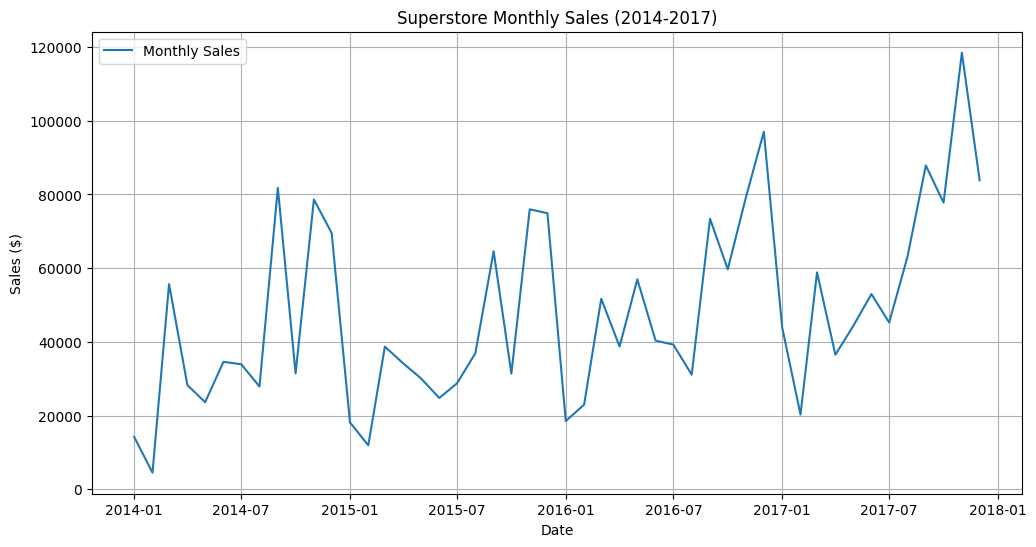

                Order Date          Sales
count                   48      48.000000
mean   2015-12-16 11:00:00   47858.351256
min    2014-01-01 00:00:00    4519.892000
25%    2014-12-24 06:00:00   29790.096125
50%    2015-12-16 12:00:00   39803.248500
75%    2016-12-08 18:00:00   65833.343625
max    2017-12-01 00:00:00  118447.825000
std                    NaN   25195.890700


In [ ]:
#monthly_sales.info()  #To check the data types of each column/attribute

# As you can see Order data is not in the datetime format that's why it is showing error while creating visualization
# Now I am going to fix it by converting Order Date to datetime format from period[M]. For that I've used dates package in mplotlib
import matplotlib.dates as mdates

monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label='Monthly Sales')
plt.title('Superstore Monthly Sales (2014-2017)')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

# Basic stats
print(monthly_sales.describe())

As you can see from the above chart there are various highs and lows in these 3 years. Sales reached all time high in november 2017 with close to $120000 worth of sales. But over these years we can see the upward trend in sales of we draw a straight line. But one thing to note is that there is a spike in sales near the end of year then sales drastically falls after that and this trend continues in these 3 years.

Now we can proceed towards forcasting sales for the next 12 months using an exponential smoothing for that we'll use statsmodel library to create a model where we will import a function called Exponential Smoothing.

In [ ]:
# Importing the forecasting model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Selecting the sales column
sales_ts = monthly_sales['Sales']

# Splitting into training and testing data
train = sales_ts[:-6]
test = sales_ts[-6:]

# Building the Model
model = ExponentialSmoothing(train, seasonal= 'add', seasonal_periods=12)

# Fitting the Model(actually training the model)
fitted_model = model.fit()

# Forecasting Future Sales
forecast = fitted_model.forecast(18)

# Creating future dates for forecasted values
forecast_dates = pd.date_range(start=monthly_sales['Order Date'].iloc[-1], periods=18, freq='M')

# Building forecast dataframe
forecast_df = pd.DataFrame({'Order Date': forecast_dates, 'Sales': forecast})

# Combining actual and forecasted data
combined_df = pd.concat([monthly_sales, forecast_df], ignore_index=True)

# Saving csv for tableau
combined_df.to_csv('sales_forecast.csv', index=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-8-7a5750ccb873>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_sales['Order Date'].iloc[-1], periods=18, freq='M')


In [ ]:
# Exporting the csv file
from google.colab import files
files.download("sales_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluating the Model

In [ ]:
#Importing numpy for calculating error metrics
import numpy as np

#Getting model predictions for the test period
test_predictions = forecast[:6]

#Calculating the Error Metrics(Mean Absolute Error and Mean Absolute Percentage Error)
mae = np.mean(np.abs(test - test_predictions))
mape = np.mean(np.abs((test - test_predictions)/test)) * 100

# Printing the results
print(f"mae: {mae:.2f}")
print(f"mape: {mape:.2f}%")

mae: 13969.98
mape: 16.68%


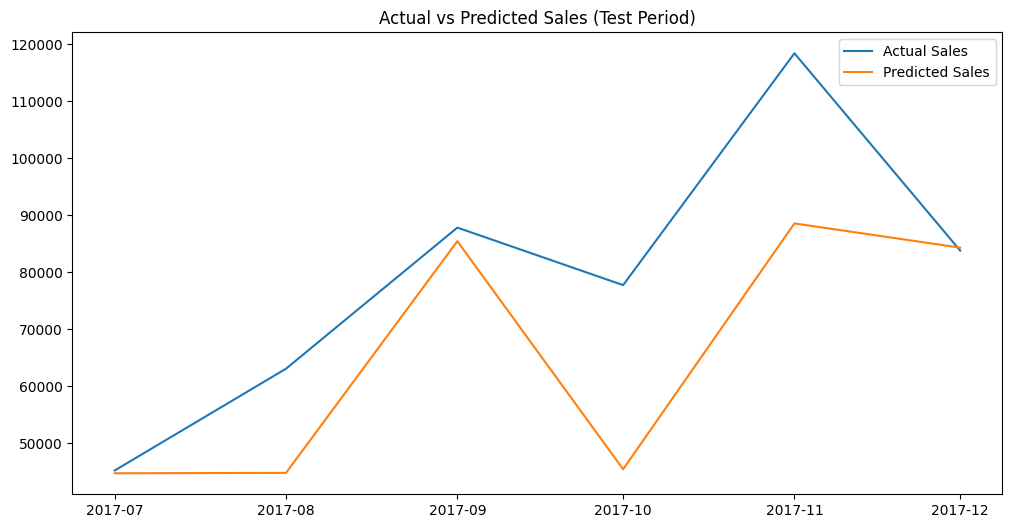

In [ ]:
# Visualizing Actual vs Predicted

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'][-6:], test, label='Actual Sales')
plt.plot(monthly_sales['Order Date'][-6:], test_predictions, label='Predicted Sales')
plt.title('Actual vs Predicted Sales (Test Period)')
plt.legend()
plt.show()